| Wohnfläche (qm) | Preis (EUR) |
| --------------: | ----------: |
|             100 |         400 |
|             150 |         500 |

In [100]:
import numpy as np

# import cupy as np
# np.cuda.Device(0).use()

In [101]:
input_data = [
    [100, 400],
    [150, 500],
    [200, 800], # experiment
]

In [102]:
def gradientDescentStep(input_data, theta: np.ndarray, alpha):
    n = len(input_data)
    pre_theta = np.zeros(2)
    pre_factor = alpha / n
    for i in range(n):
        x = np.array([1, input_data[i][0]])
        y = input_data[i][1]
        pre_theta = pre_theta + pre_factor * ((y - (theta@x)) * x)
    return theta + pre_theta

In [103]:
alpha = 0.000001
theta = np.array([100, 3])  # starting point
rounds = 5000000

In [104]:
print(f"[0/{rounds}] f(x)={theta[1]} * x + {theta[0]}")
for i in range(1, rounds + 1):
    theta = gradientDescentStep(input_data, theta, alpha)
    if i % 100000 == 0:
        print(f"[{i}/{rounds}] f(x)={theta[1]} * x + {theta[0]}")

[0/5000000] f(x)=3 * x + 100
[100000/5000000] f(x)=3.1780924883899098 * x + 99.0847212187834
[200000/5000000] f(x)=3.183741098281726 * x + 98.17466999984187
[300000/5000000] f(x)=3.1893508877548764 * x + 97.27087316383727
[400000/5000000] f(x)=3.194922123605072 * x + 96.37328772713926
[500000/5000000] f(x)=3.2004550707944444 * x + 95.48187100152614
[600000/5000000] f(x)=3.205949992464165 * x + 94.596580592152
[700000/5000000] f(x)=3.211407149946982 * x + 93.71737439552871
[800000/5000000] f(x)=3.216826802779584 * x + 92.84421059753016
[900000/5000000] f(x)=3.222209208714984 * x + 91.97704767140101
[1000000/5000000] f(x)=3.227554623734746 * x + 91.11584437578435
[1100000/5000000] f(x)=3.2328633020612294 * x + 90.26055975275072
[1200000/5000000] f(x)=3.2381354961696167 * x + 89.41115312585899
[1300000/5000000] f(x)=3.243371456799926 * x + 88.56758409822125
[1400000/5000000] f(x)=3.248571432968998 * x + 87.7298125505721
[1500000/5000000] f(x)=3.2537356719822323 * x + 86.89779863937821
[16

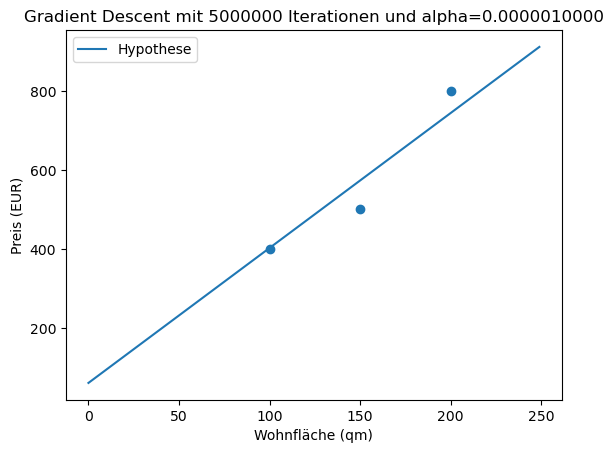

In [105]:
import matplotlib.pyplot as plt

draw_range = range(0, max([x[0] for x in input_data]) + 50)
approximation = np.array([theta[1] * x + theta[0] for x in draw_range])
plt.plot(draw_range, approximation, label="Hypothese")
# correct = np.array([2 * x + 200 for x in draw_range])
# plt.plot(draw_range, correct, label="Berechnet mit Normalengleichung")
plt.scatter([x[0] for x in input_data], [x[1] for x in input_data])
plt.xlabel("Wohnfläche (qm)")
plt.ylabel("Preis (EUR)")
plt.title(f"Gradient Descent mit {rounds} Iterationen und alpha={alpha:.10f}")
plt.legend()
plt.show()